In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
test_orig = pd.read_csv('/content/drive/My Drive/Data Science/Estudo   Modelos/Datasets/Codenation/Semana 8/test.csv')
train_orig = pd.read_csv('/content/drive/My Drive/Data Science/Estudo   Modelos/Datasets/Codenation/Semana 8/train.csv')


In [23]:
test_orig.shape

(4570, 43)

In [24]:
train_orig.shape

(13730, 167)

In [52]:
train_orig.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,0,A,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,0,A,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,F,D,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,F,A,0


In [26]:
features = test_orig.columns.to_list()

train_orig = train_orig[features + ['IN_TREINEIRO']]

In [27]:
test_orig.shape , train_orig.shape

((4570, 43), (13730, 44))

**Missing Value**

Verificando os dados, a nossa variavel target IN_TREINEIRO não possui valores faltantes

In [28]:
train_orig.isnull().sum().sort_values(ascending=False).head(20)

TP_DEPENDENCIA_ADM_ESC    9448
TP_ENSINO                 9448
Q027                      7373
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_LC                3597
NU_NOTA_REDACAO           3597
NU_NOTA_COMP5             3597
NU_NOTA_COMP4             3597
NU_NOTA_CN                3389
NU_NOTA_CH                3389
TP_ESCOLA                    0
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
TP_ANO_CONCLUIU              0
IN_TREINEIRO                 0
TP_ST_CONCLUSAO              0
IN_DISLEXIA                  0
dtype: int64

In [29]:
test_orig.isnull().sum().sort_values(ascending=False).head(20)

TP_DEPENDENCIA_ADM_ESC    3144
TP_ENSINO                 3144
Q027                      2437
NU_NOTA_COMP1             1170
NU_NOTA_COMP5             1170
TP_STATUS_REDACAO         1170
NU_NOTA_COMP2             1170
NU_NOTA_COMP3             1170
NU_NOTA_COMP4             1170
NU_NOTA_REDACAO           1170
NU_NOTA_LC                1170
NU_NOTA_CH                1112
NU_NOTA_CN                1112
TP_ESCOLA                    0
IN_BAIXA_VISAO               0
TP_ANO_CONCLUIU              0
IN_CEGUEIRA                  0
Q047                         0
TP_ST_CONCLUSAO              0
IN_DISLEXIA                  0
dtype: int64

In [30]:
train_orig.fillna(0, inplace= True)
test_orig.fillna(0, inplace= True)

### Verificando e balanceando as classes

Escolhendo as features mais relevantes de acordo com o dicionário de dados do enem

In [31]:
train = train_orig[['NU_IDADE','TP_ST_CONCLUSAO','IN_TREINEIRO']]
test = test_orig[['NU_IDADE','TP_ST_CONCLUSAO']]

In [32]:
train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

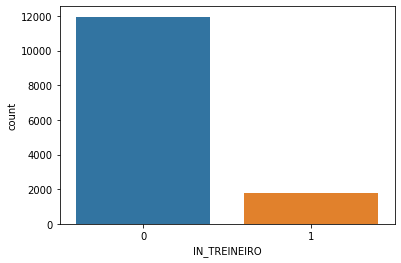

In [33]:
sns.countplot(x=train['IN_TREINEIRO'])

### Pycaret

In [41]:
from pycaret.classification import *

clf = setup(train, target='IN_TREINEIRO')
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9977,0.9967,0.9824,1.0000,0.9911,0.9898,0.9898,0.0181
1,Decision Tree Classifier,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,0.0064
2,Random Forest Classifier,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,0.1122
3,Ada Boost Classifier,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,1.0154
4,Gradient Boosting Classifier,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,0.2787
5,Extra Trees Classifier,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,0.2526
6,Extreme Gradient Boosting,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,0.2459
7,Light Gradient Boosting Machine,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,0.0596
8,CatBoost Classifier,0.9977,0.9998,0.9824,1.0000,0.9911,0.9898,0.9898,3.3617
9,Logistic Regression,0.9971,0.9997,0.9824,0.9952,0.9887,0.9870,0.9871,0.1122


In [60]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9969,0.9998,0.9760,1.0000,0.9879,0.9861,0.9862
1,0.9990,0.9999,0.9920,1.0000,0.9960,0.9954,0.9954
2,0.9979,0.9999,0.9840,1.0000,0.9919,0.9907,0.9908
3,0.9958,0.9998,0.9680,1.0000,0.9837,0.9814,0.9815
4,0.9958,0.9996,0.9680,1.0000,0.9837,0.9814,0.9815
5,0.9990,0.9999,0.9920,1.0000,0.9960,0.9954,0.9954
6,0.9969,0.9997,0.9760,1.0000,0.9879,0.9861,0.9862
7,0.9979,0.9999,0.9840,1.0000,0.9919,0.9907,0.9908
8,0.9969,0.9999,0.9758,1.0000,0.9878,0.9860,0.9861
9,0.9958,0.9998,0.9677,1.0000,0.9836,0.9812,0.9814


In [72]:
predict_model(dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9966,0.9998,0.9738,1.0,0.9867,0.9848,0.9849


,NU_IDADE,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,IN_TREINEIRO,Label,Score
0,25.0,1.0,0.0,0.0,0.0,0,0,0.0
1,18.0,0.0,1.0,0.0,0.0,0,0,0.0
2,40.0,1.0,0.0,0.0,0.0,0,0,0.0
3,18.0,0.0,1.0,0.0,0.0,0,0,0.0
4,18.0,0.0,1.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...
4115,17.0,0.0,0.0,1.0,0.0,1,1,1.0
4116,25.0,1.0,0.0,0.0,0.0,0,0,0.0
4117,19.0,1.0,0.0,0.0,0.0,0,0,0.0
4118,20.0,1.0,0.0,0.0,0.0,0,0,0.0


Visualizando as predições na base de Test

In [61]:
predict_model(dt, data = test)

,NU_IDADE,TP_ST_CONCLUSAO,Label,Score
0,19,1,0,0.0
1,24,1,0,0.0
2,16,3,1,1.0
3,17,2,0,0.0
4,19,1,0,0.0
...,...,...,...,...
4565,17,2,0,0.0
4566,20,1,0,0.0
4567,22,1,0,0.0
4568,19,2,0,0.0


In [62]:
predict = predict_model(dt, data = test)

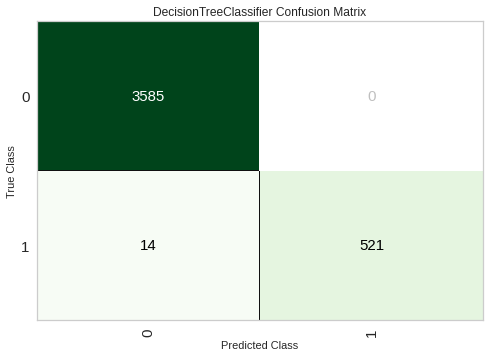

In [63]:
plot_model(estimator = dt, plot = 'confusion_matrix')

### Arquivo answer para envio do desafio

In [70]:
answer = pd.DataFrame({'NU_INSCRICAO':  test_orig['NU_INSCRICAO'],  'IN_TREINEIRO':predict['Label']})
answer.sample(10)

,NU_INSCRICAO,IN_TREINEIRO
310,3e84dad06c9b5fb4e71ebeb72cbc440e98433335,0
428,1094ce977f13f80e2b055b0878963dec0379fafa,0
1214,fa01f388a73aaaaf0c4b353b1d11aaa445ac105d,0
580,0343c00ed79ce55f3175eca323a6c2a26ed1c799,0
60,b34a447f5b6dc271d319611dc6ef13d3af1d2efa,0
3298,93ee554771c0032f86f6f30cb0136e5526be468f,0
3138,dcf3d9b439d418554ac965b911668197a9cb759a,0
1419,ad277e071beb9a9655bf9adc678275cfb1f70a21,0
1367,03c444519d3909f5cd1fe99248e0707809d2f6b4,0
2622,908e25dc0e22cd2770feccb52180b13637e4ab6d,0


In [71]:
answer.to_csv('answer.csv',index=False,header=True)

Ao submeter o desafio na plataforma da Codenation, obtive o Score de **99,73%**